# Problem 3a)

In [1]:
import numpy as np
np.random.seed(1)

X1 = np.random.randn(50, 500)
X2 = np.random.randn(500, 5000)
X3 = np.random.randn(5000, 50000)

beta1 = np.zeros((500,1))
beta2 = np.zeros((5000,1))
beta3 = np.zeros((50000,1))

k1 = np.random.randint(501, size=5)
k2 = np.random.randint(5001, size=5)
k3 = np.random.randint(50001, size=5)

for pos in k1:
    beta1[pos] = 1.

for pos in k2:
    beta2[pos] = 1.

for pos in k3:
    beta3[pos] = 1.
    
y1 = X1.dot(beta1) + np.random.randn(50,1)*np.sqrt(0.1)
y2 = X2.dot(beta2) + np.random.randn(500,1)*np.sqrt(0.1)
y3 = X3.dot(beta3) + np.random.randn(5000,1)*np.sqrt(0.1)

Xtest1 = np.random.randn(100, 500)
Xtest2 = np.random.randn(100, 5000)
Xtest3 = np.random.randn(100, 50000)

ytest1 = Xtest1.dot(beta1) + np.random.randn(100,1)*np.sqrt(0.1)
ytest2 = Xtest2.dot(beta2) + np.random.randn(100,1)*np.sqrt(0.1)
ytest3 = Xtest3.dot(beta3) + np.random.randn(100,1)*np.sqrt(0.1)

# Part b) 

Small Matrix:

In [2]:
from cvxpy import *
beta1_star = Variable(500)
objective = Minimize(sum_squares(X1*beta1_star - y1))
prob = Problem(objective)

result = prob.solve(verbose=True)


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +3.343e-17  -7.692e-03  +7e+01  5e-01  1e-03  1e+00  3e+01    ---    ---    1  1  - |  -  - 
 1  -1.050e-02  -7.429e-03  +7e-01  9e-03  1e-05  1e-02  4e-01  0.9890  1e-04   1  1  1 |  0  0
 2  -1.389e-03  -1.343e-03  +9e-03  1e-04  1e-07  2e-04  4e-03  0.9883  1e-04   1  2  2 |  0  0
 3  -1.604e-05  -1.511e-05  +1e-04  1e-06  1e-09  2e-06  5e-05  0.9890  1e-04   1  1  1 |  0  0
 4  -1.832e-07  -1.684e-07  +1e-06  1e-08  2e-11  3e-08  5e-07  0.9890  1e-04   1  1  1 |  0  0
 5  -2.090e-09  -1.877e-09  +1e-08  1e-10  2e-13  4e-10  6e-09  0.9890  1e-04   1  1  1 |  0  0
 6  -2.382e-11  -2.092e-11  +1e-10  2e-12  2e-15  5e-12  7e-11  0.9890  1e-04   1  1  1 |  0  0

OPTIMAL (within feastol=1.6e-12, reltol=5.4e+00, abstol=1.3e-10).
Runtime: 0.030883 seconds.



Medium Matrix

In [3]:
from cvxpy import *
beta2_star = Variable(5000)
objective = Minimize(sum_squares(X2*beta2_star - y2))
prob = Problem(objective)

result = prob.solve(verbose=True)


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +2.367e-17  -7.207e-04  +7e+02  5e-01  3e-05  1e+00  3e+02    ---    ---    1  1  - |  -  - 
 1  -3.504e-02  -7.429e-04  +8e+00  1e-02  4e-07  5e-02  4e+00  0.9890  1e-04   1  1  1 |  0  0
 2  -1.360e-03  -6.052e-04  +8e-02  1e-04  4e-09  9e-04  4e-02  0.9890  1e-04   1  1  1 |  0  0
 3  -2.492e-05  -1.232e-05  +9e-04  1e-06  4e-11  1e-05  5e-04  0.9890  1e-04   1  2  2 |  0  0
 4  -3.449e-07  -1.591e-07  +1e-05  1e-08  5e-13  2e-07  5e-06  0.9890  1e-04   1  1  1 |  0  0
 5  -4.579e-09  -2.012e-09  +1e-07  1e-10  5e-15  3e-09  6e-08  0.9890  1e-04   1  1  1 |  0  0
 6  -5.905e-11  -2.503e-11  +1e-09  1e-12  6e-17  4e-11  7e-10  0.9890  1e-04   1  1  1 |  0  0

OPTIMAL (within feastol=1.5e-12, reltol=2.2e+01, abstol=1.3e-09).
Runtime: 16.789016 seconds.



Large Matrix

In [ ]:
from cvxpy import *
beta3_star = Variable(50000)
objective = Minimize(sum_squares(X3*beta3_star - y3))
prob = Problem(objective)

result = prob.solve(verbose=True)

CVXPY is taking longer than 15 minutes for the Large Matrix case.

### Plots for Small Matrix

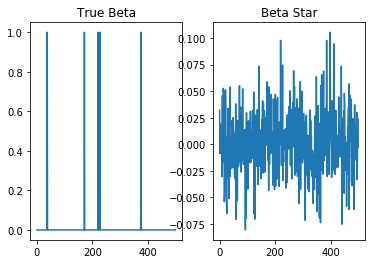

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 2)
ax[0].plot(beta1)
ax[0].set_title("True Beta")
ax[1].plot(beta1_star.value)
ax[1].set_title("Beta Star")

### Plots for Medium Matrix

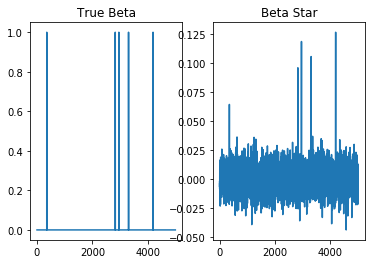

In [5]:
%matplotlib inline
fig, ax = plt.subplots(1,2)
ax[0].plot(beta2)
ax[0].set_title("True Beta")
ax[1].plot(beta2_star.value)
ax[1].set_title("Beta Star")

### Regression Error

In [7]:
RE1 = np.linalg.norm(X1.dot(beta1_star.value) - y1)
RE2 = np.linalg.norm(X2.dot(beta2_star.value) - y2)
print("Regression Error for Small Matrix = ", RE1)
print("Regression Error for Medium Matrix = ", RE2)

Regression Error for Small Matrix =  4.15178231729e-14
Regression Error for Medium Matrix =  1.14589974003e-13


Regression Error for the Large Matrix was not calculated because it was not completing. 

### Testing Error

In [8]:
TE1 = np.linalg.norm(Xtest1.dot(beta1_star.value) - ytest1)
TE2 = np.linalg.norm(Xtest2.dot(beta2_star.value) - ytest2)

print("Testing Error for Small Matrix = ", TE1)
print("Testing Error for Medium Matrix = ", TE2)

Testing Error for Small Matrix =  21.2050585622
Testing Error for Medium Matrix =  23.1729309551


# Part c) LASSO

In [9]:
from cvxpy import *
beta1_star = Variable(500)
lamda = 0.001
objective = Minimize(sum_squares(X1*beta1_star - y1) + lamda*norm(beta1_star, 1))
prob = Problem(objective)

result = prob.solve(verbose=True)


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -2.327e-17  -9.847e-03  +1e+03  1e+00  5e-01  1e+00  1e+00    ---    ---    1  1  - |  -  - 
 1  +2.692e-01  +2.647e-01  +6e+01  3e-02  2e-02  4e-02  6e-02  0.9560  1e-03   1  1  1 |  0  0
 2  +4.570e-02  +3.996e-02  +1e+01  4e-03  2e-03  5e-04  1e-02  0.8088  8e-03   1  1  1 |  0  0
 3  +7.173e-03  +7.431e-03  +1e+01  6e-04  3e-05  9e-04  1e-02  0.3796  7e-01   1  1  1 |  0  0
 4  +6.523e-03  +6.541e-03  +5e+00  2e-04  1e-05  3e-04  5e-03  0.7302  2e-01   1  1  1 |  0  0
 5  +5.759e-03  +5.704e-03  +2e+00  4e-05  4e-06  5e-05  2e-03  0.9890  4e-01   1  1  1 |  0  0
 6  +5.657e-03  +5.637e-03  +8e-01  1e-05  1e-06  2e-05  8e-04  0.6161  2e-02   1  1  1 |  0  0
 7  +5.618e-03  +5.608e-03  +2e-01  4e-06  4e-07  2e-06  2e-04  0.9890  3e-01   1  1  1 |  0  0
 8  +5.574e-03  +5.571e-03  +8e-02  1e-06  1e-

In [10]:
from cvxpy import *
beta2_star = Variable(5000)
lamda = 0.001
objective = Minimize(sum_squares(X2*beta2_star - y2) + lamda*norm(beta2_star, 1))
prob = Problem(objective)

result = prob.solve(verbose=True)


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -1.216e-17  -1.212e-03  +1e+04  1e+00  2e-01  1e+00  1e+00    ---    ---    1  1  - |  -  - 
 1  +3.779e-01  +3.677e-01  +6e+02  3e-02  1e-02  4e-02  6e-02  0.9479  6e-04   1  1  1 |  0  0
 2  +7.026e-02  +6.310e-02  +1e+02  5e-03  1e-03  7e-04  1e-02  0.7855  1e-02   1  1  2 |  0  0
 3  +2.103e-02  +2.070e-02  +1e+02  1e-03  5e-05  1e-03  1e-02  0.1221  7e-01   1  1  1 |  0  0
 4  +7.293e-03  +7.576e-03  +7e+01  3e-04  5e-06  7e-04  7e-03  0.9890  5e-01   1  1  1 |  0  0
 5  +6.686e-03  +6.720e-03  +1e+01  3e-05  6e-07  8e-05  1e-03  0.8546  1e-02   1  1  1 |  0  0
 6  +7.860e-03  +7.870e-03  +7e+00  2e-05  3e-07  4e-05  7e-04  0.5698  2e-01   1  1  1 |  0  0
 7  +8.191e-03  +8.188e-03  +3e+00  9e-06  2e-07  9e-06  3e-04  0.7864  3e-01   1  1  1 |  0  0
 8  +8.369e-03  +8.366e-03  +1e+00  4e-06  7e-

In [ ]:
from cvxpy import *
beta3_star = Variable(50000)
lamda = 0.001
objective = Minimize(sum_squares(X3*beta3_star - y3) + lamda*norm(beta3_star, 1))
prob = Problem(objective)

result = prob.solve(verbose=True)

### Plots for Small Matrix

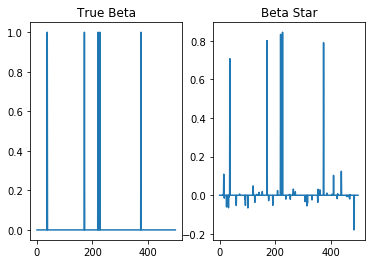

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 2)
ax[0].plot(beta1)
ax[0].set_title("True Beta")
ax[1].plot(beta1_star.value)
ax[1].set_title("Beta Star")

### Plots for Medium Matrix

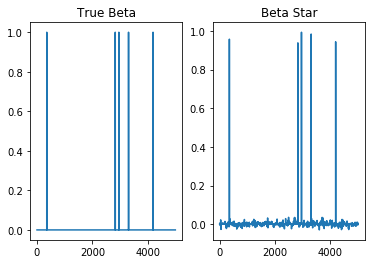

In [12]:
%matplotlib inline
fig, ax = plt.subplots(1,2)
ax[0].plot(beta2)
ax[0].set_title("True Beta")
ax[1].plot(beta2_star.value)
ax[1].set_title("Beta Star")

### Regression Error

In [18]:
RE1 = np.linalg.norm(X1.dot(beta1_star.value) - y1)
RE2 = np.linalg.norm(X2.dot(beta2_star.value) - y2)
print("Regression Error for Small Matrix = ", RE1)
print("Regression Error for Medium Matrix = ", RE2)

Regression Error for Small Matrix =  2.28906182223
Regression Error for Medium Matrix =  0.000304261586821


### Testing Error

In [19]:
TE1 = np.linalg.norm(Xtest1.dot(beta1_star.value) - ytest1)
TE2 = np.linalg.norm(Xtest2.dot(beta2_star.value) - ytest2)

print("Testing Error for Small Matrix = ", TE1)
print("Testing Error for Medium Matrix = ", TE2)

Testing Error for Small Matrix =  6.47569229721
Testing Error for Medium Matrix =  3.73830468403


$\lambda = 0.001$ is not a good solution and provides a faster result, but the same one. Below is the solution for $\lambda = 10$. 

In [15]:
from cvxpy import *
beta1_star = Variable(500)
lamda = 10
objective = Minimize(sum_squares(X1*beta1_star - y1) + lamda*norm(beta1_star, 1))
prob = Problem(objective)

result = prob.solve(verbose=True)


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -2.327e-17  -9.847e-03  +8e+03  1e+00  1e-01  1e+00  8e+00    ---    ---    1  1  - |  -  - 
 1  +1.043e+00  +1.181e+00  +2e+03  7e-01  2e-02  3e-01  2e+00  0.8190  2e-02   1  2  2 |  0  0
 2  +3.232e+01  +3.292e+01  +1e+03  6e-01  1e-02  7e-01  1e+00  0.7209  8e-01   2  2  2 |  0  0
 3  +3.414e+01  +3.466e+01  +1e+03  6e-01  1e-02  6e-01  1e+00  0.2887  4e-01   2  2  2 |  0  0
 4  +2.627e+01  +2.676e+01  +8e+02  6e-01  8e-03  6e-01  8e-01  0.7506  7e-01   2  2  2 |  0  0
 5  +3.773e+01  +3.800e+01  +4e+02  4e-01  4e-03  3e-01  4e-01  0.4777  4e-02   2  2  2 |  0  0
 6  +3.050e+01  +3.076e+01  +4e+02  3e-01  4e-03  3e-01  4e-01  0.1163  9e-01   2  2  2 |  0  0
 7  +3.695e+01  +3.711e+01  +3e+02  2e-01  2e-03  2e-01  3e-01  0.6111  3e-01   2  2  2 |  0  0
 8  +4.002e+01  +4.011e+01  +2e+02  1e-01  1e-

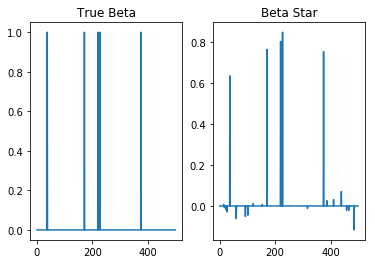

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 2)
ax[0].plot(beta1)
ax[0].set_title("True Beta")
ax[1].plot(beta1_star.value)
ax[1].set_title("Beta Star")

In [17]:
RE1 = np.linalg.norm(X1.dot(beta1_star.value) - y1)
print("Regression Error for Small Matrix = ", RE1)

Regression Error for Small Matrix =  2.28906182223


A higher lambda, gives us a better result to a certain extent. When it begins to dominate the original cost function, the regression error can be much higher.

# Problem 4
For the small matrix first:

In [32]:
%%timeit
yres = y1
y = y1
rows, cols = X1.shape
X = X1
I = []

ind = 0

for k in range(5):
    max_val = 0
    for i in range(cols):
        tempX = X[:,i].reshape(rows, 1)
        tempval = np.transpose(yres).dot(tempX)
        if tempval > max_val:
            max_val = tempval
            ind = i
    I = I + [ind]
    Xi = np.zeros((rows, len(I)))
    l = 0
    for idx in I:
        for i in range(rows):
            Xi[i, l] = X[i, idx]
        l = l + 1
    beta = Variable(len(I))
    obj = Minimize(sum_squares(Xi*beta - y))
    prob = Problem(obj)
    result = prob.solve(verbose=False)
    
    # yres = y - Xi*beta.value
    yres = y - np.dot(Xi, beta.value)
Ism = []
Ism = Ism + I

beta_star1 = np.zeros((cols,1))
l = 0
for idx in I:
    beta_star1[idx] = beta.value[l]
    l = l + 1


44.3 ms ± 4.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
yres = y1
y = y1
rows, cols = X1.shape
X = X1
I = []

ind = 0

for k in range(5):
    max_val = 0
    for i in range(cols):
        tempX = X[:,i].reshape(rows, 1)
        tempval = np.transpose(yres).dot(tempX)
        if tempval > max_val:
            max_val = tempval
            ind = i
    I = I + [ind]
    Xi = np.zeros((rows, len(I)))
    l = 0
    for idx in I:
        for i in range(rows):
            Xi[i, l] = X[i, idx]
        l = l + 1
    beta = Variable(len(I))
    obj = Minimize(sum_squares(Xi*beta - y))
    prob = Problem(obj)
    result = prob.solve(verbose=False)
    
    # yres = y - Xi*beta.value
    yres = y - np.dot(Xi, beta.value)
Ism = []
Ism = Ism + I

beta_star1 = np.zeros((cols,1))
l = 0
for idx in I:
    beta_star1[idx] = beta.value[l]
    l = l + 1

The sparsity pattern is:

In [35]:
print(Ism)

[227, 220, 171, 375, 37]


For the medium matrix:

In [38]:
%%timeit
yres = y2
y = y2
rows, cols = X2.shape
X = X2
I = []

ind = 0

for k in range(5):
    max_val = 0
    for i in range(cols):
        tempX = X[:,i].reshape(rows, 1)
        tempval = np.transpose(yres).dot(tempX)
        if tempval > max_val:
            max_val = tempval
            ind = i
    I = I + [ind]
    Xi = np.zeros((rows, len(I)))
    l = 0
    for idx in I:
        for i in range(rows):
            Xi[i, l] = X[i, idx]
        l = l + 1
    beta = Variable(len(I))
    obj = Minimize(sum_squares(Xi*beta - y))
    prob = Problem(obj)
    result = prob.solve(verbose=False)
    
    # yres = y - Xi*beta.value
    yres = y - np.dot(Xi, beta.value)
I2 = I
beta_star2 = np.zeros((cols,1))
l = 0
for idx in I:
    beta_star2[idx] = beta.value[l]
    l = l + 1

423 ms ± 49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
yres = y2
y = y2
rows, cols = X2.shape
X = X2
I = []

ind = 0

for k in range(5):
    max_val = 0
    for i in range(cols):
        tempX = X[:,i].reshape(rows, 1)
        tempval = np.transpose(yres).dot(tempX)
        if tempval > max_val:
            max_val = tempval
            ind = i
    I = I + [ind]
    Xi = np.zeros((rows, len(I)))
    l = 0
    for idx in I:
        for i in range(rows):
            Xi[i, l] = X[i, idx]
        l = l + 1
    beta = Variable(len(I))
    obj = Minimize(sum_squares(Xi*beta - y))
    prob = Problem(obj)
    result = prob.solve(verbose=False)
    
    # yres = y - Xi*beta.value
    yres = y - np.dot(Xi, beta.value)
I2 = I
beta_star2 = np.zeros((cols,1))
l = 0
for idx in I:
    beta_star2[idx] = beta.value[l]
    l = l + 1

The sparsity pattern is:

In [37]:
print(I2)

[353, 4193, 3308, 2828, 2958]


Large Matrix:

In [ ]:
%%timeit
yres = y3
y = y3
rows, cols = X3.shape
X = X3
I = []

ind = 0

for k in range(5):
    max_val = 0
    for i in range(cols):
        tempX = X[:,i].reshape(rows, 1)
        tempval = np.transpose(yres).dot(tempX)
        if tempval > max_val:
            max_val = tempval
            ind = i
    I = I + [ind]
    Xi = np.zeros((rows, len(I)))
    l = 0
    for idx in I:
        for i in range(rows):
            Xi[i, l] = X[i, idx]
        l = l + 1
    beta = Variable(len(I))
    obj = Minimize(sum_squares(Xi*beta - y))
    prob = Problem(obj)
    result = prob.solve(verbose=False)
    
    # yres = y - Xi*beta.value
    yres = y - np.dot(Xi, beta.value)

beta_star3 = np.zeros((cols,1))
l = 0
for idx in I:
    beta_star3[idx] = beta.value[l]
    l = l + 1

In [ ]:
yres = y3
y = y3
rows, cols = X3.shape
X = X3
I = []

ind = 0

for k in range(5):
    max_val = 0
    for i in range(cols):
        tempX = X[:,i].reshape(rows, 1)
        tempval = np.transpose(yres).dot(tempX)
        if tempval > max_val:
            max_val = tempval
            ind = i
    I = I + [ind]
    Xi = np.zeros((rows, len(I)))
    l = 0
    for idx in I:
        for i in range(rows):
            Xi[i, l] = X[i, idx]
        l = l + 1
    beta = Variable(len(I))
    obj = Minimize(sum_squares(Xi*beta - y))
    prob = Problem(obj)
    result = prob.solve(verbose=False)
    
    # yres = y - Xi*beta.value
    yres = y - np.dot(Xi, beta.value)

beta_star3 = np.zeros((cols,1))
l = 0
for idx in I:
    beta_star3[idx] = beta.value[l]
    l = l + 1

The large matrix would not complete after 5 minutes.

Regression Error

In [41]:
RE1 = np.linalg.norm(X1.dot(beta_star1) - y1)
RE2 = np.linalg.norm(X2.dot(beta_star2) - y2)
print("Regression Error for Small Matrix = ", RE1)
print("Regression Error for Medium Matrix = ", RE2)

Regression Error for Small Matrix =  2.09100888454
Regression Error for Medium Matrix =  7.17539060951


Testing Error

In [42]:
TE1 = np.linalg.norm(Xtest1.dot(beta_star1) - ytest1)
TE2 = np.linalg.norm(Xtest2.dot(beta_star2) - ytest2)

print("Testing Error for Small Matrix = ", TE1)
print("Testing Error for Medium Matrix = ", TE2)

Testing Error for Small Matrix =  3.39566861023
Testing Error for Medium Matrix =  3.36753159451
